---
title: "Pandas - Corona Virus Count Analysis"
description: "Corona Virus Count Analysis"
layout: post
toc: false
comments: true
image: images/some_folder/your_image.png
hide: false
search_exclude: true
categories: [fastpages, colab, pandas, python]
metadata_key1: metadata_value1
metadata_key2: metadata_value2
---

* [인프런 - 단 두 장의 문서로 데이터 분석과 시각화 뽀개기](https://www.inflearn.com/course/%ED%8C%90%EB%8B%A4%EC%8A%A4-Pandas)에서 전 코드에 대한 강좌를 보실 수 있습니다.

## 서울시에서 공개한 코로나19 발생동향 분석
* http://www.seoul.go.kr/coronaV/coronaStatus.do


해당 데이터는 지금도 업데이트가 되고 있는 데이터셋입니다. 
최근 데이터로 실습을 하시면 변경된 내용이 많아 당황하실 수 있습니다. <font color="red">6월 30일자 기준 데이터</font>로 우선 실습해 보시고 응용해 보는 걸 권장합니다.

In [ ]:
# pandas, numpy 라이브러리 로드하기

import pandas as pd
import numpy as np

In [ ]:
# file_name 변수에 read_html 로 저장한 파일명을 지정해 줍니다.
file_name = f"/content/sample_data/seoul-covid19_6_30_.csv"
file_name

'/content/sample_data/seoul-covid19_6_30_.csv'

* CSV 파일 다운로드 : https://raw.githubusercontent.com/corazzon/cracking-the-pandas-cheat-sheet/master/seoul-covid19_6_30_.csv

In [ ]:
# 아래 코드의 주석을 풀고 바로 읽어올 수도 있습니다.
# pd.read_csv("https://raw.githubusercontent.com/corazzon/cracking-the-pandas-cheat-sheet/master/seoul-covid19_6_30_.csv") 
# read_csv 로 csv 파일을 불러와 주세요.
df = pd.read_csv(file_name, encoding = 'utf-8')
df.shape

(1321, 7)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# "연번"을 기준으로 역순으로 정렬합니다.

df = df.sort_values(by = '연번', ascending = False)

df

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
...,...,...,...,...,...,...,...
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)


In [ ]:
# head 로 미리보기를 합니다.



In [ ]:
# tail 로 미리보기를 합니다.



## 시각화 도구 불러오기

findfont: Font family ['MalgunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['MalgunGothic'] not found. Falling back to DejaVu Sans.


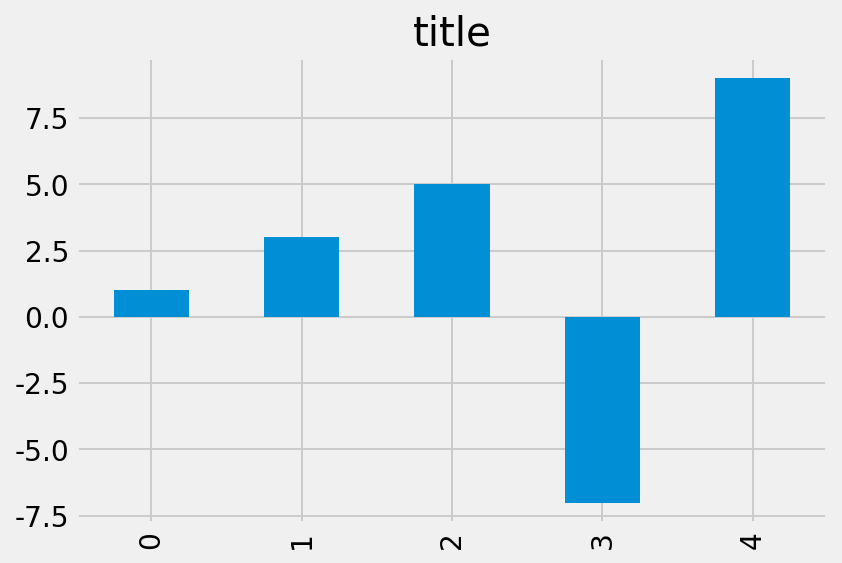

In [ ]:
# matplotlib.pyplot 을 통해 한글폰트를 설정합니다.
# plt.style.use 로 "fivethirtyeight" 스타일을 사용해 봅니다.

import matplotlib.pyplot as plt
plt.rc("font", family = "MalgunGothic")
plt.rc("axes", unicode_minus = False)

plt.style.use('fivethirtyeight')

pd.Series([1,3,5,-7,9]).plot.bar(title = 'title')


### 시각화 선명하게 설정하기

In [ ]:
# retina 디스플레이가 지원되는 환경에서 시각화의 폰트가 좀 더 선명해 보입니다.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

## 확진일

In [ ]:
# 확진일의 빈도수를 봅니다. 어느 날짜에 가장 많이 확진이 되었는지 봅니다.

df['확진일'].value_counts()

3.10.    46
6.12.    30
6.06.    29
6.05.    27
3.9.     26
         ..
4.19.     1
5.9.      1
5.01.     1
3.3.      1
3.5.      1
Name: 확진일, Length: 131, dtype: int64

In [ ]:
# "확진일" 컬럼의 데이터가 날짜 형태가 아니라 문자형태 입니다.



In [ ]:
# 데이터 타입을 변경해서 날짜형태로 변환합니다.
# 판다스의 to_datetime 을 사용해서 날짜 타입으로 변경할 수 있습니다.
# 연도가 없기 때문에 2020년을 날짜에 추가하고 "-" 문자로 날짜를 연결해 줍니다.


df['확진일자'] = pd.to_datetime("2020-"+df['확진일'].str.replace('.', '-'))


TypeError: ignored

In [ ]:
# 월만 추출합니다.


df['월'] = df.확진일자.dt.month

df[['월','확진일', '확진일자']].head()

,월,확진일,확진일자
0,6,6.30.,2020-06-30
1,6,6.30.,2020-06-30
2,6,6.30.,2020-06-30
3,6,6.30.,2020-06-30
4,6,6.30.,2020-06-30


In [ ]:
# 해당 연도의 몇번째 "주"인지 추출합니다.
df['주'] = df['확진일자'].dt.week
df[['월', '주','확진일', '확진일자']].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,월,주,확진일,확진일자
0,6,27,6.30.,2020-06-30
1,6,27,6.30.,2020-06-30
2,6,27,6.30.,2020-06-30
3,6,27,6.30.,2020-06-30
4,6,27,6.30.,2020-06-30


### 선그래프 그리기
[Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

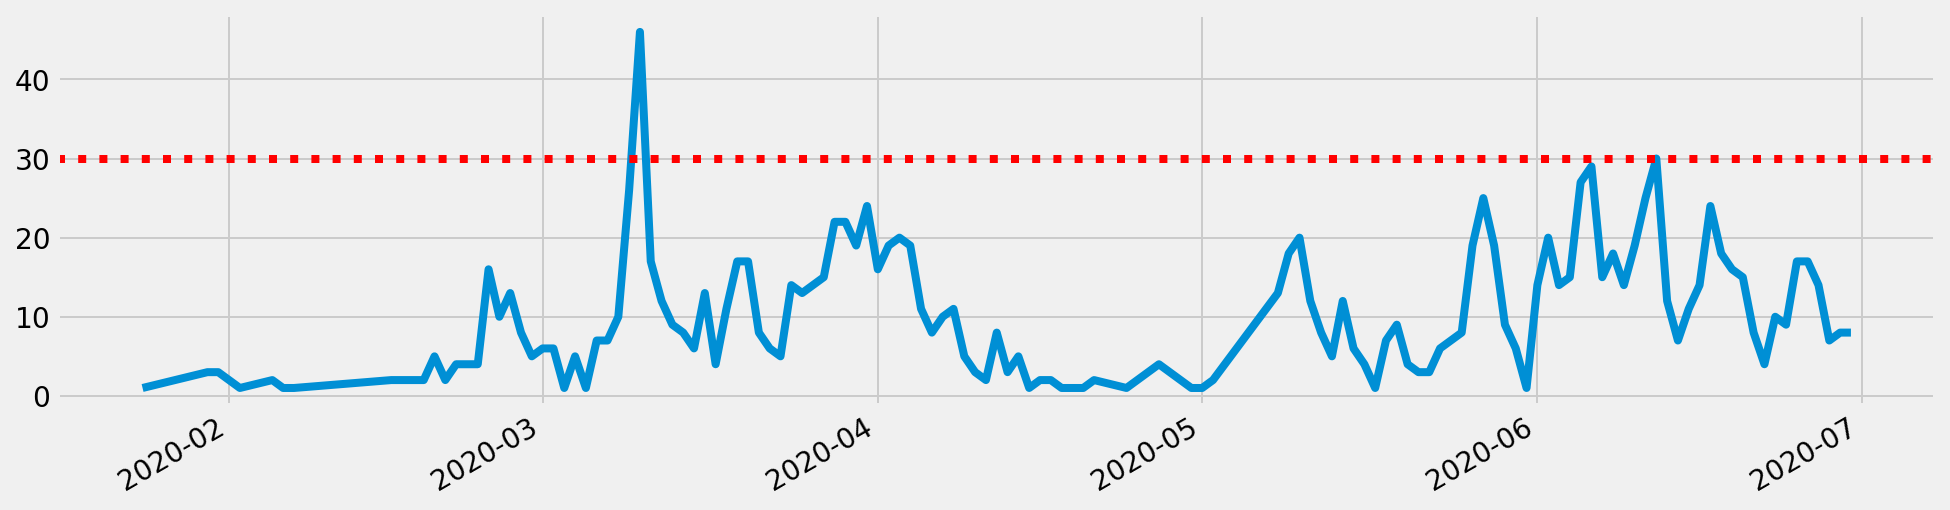

In [ ]:
# 확진일자로 선그래프를 그립니다.

df['확진일자'].value_counts().plot(figsize= (15,4))
plt.axhline(30, color = 'r', linestyle = ':')

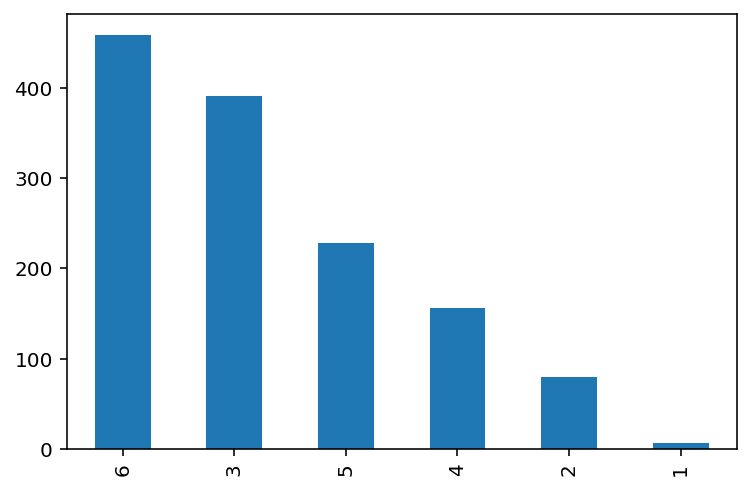

In [ ]:
df['월'].value_counts().plot.bar()

### 선그래프에 값 표시하기

In [ ]:
# 일자별 확진자수를 선그래프로 그립니다.
# 연도는 모두 2020년이기 때문에 월일만 표기되도록 슬라이싱을 사용해 "월일" 컬럼을 만듭니다.

df['월일'] = df['확진일자'].astype(str).map(lambda x : x[-5:])

day_count = df['월일'].value_counts().sort_index()

#day_count.iloc[0]

1

In [ ]:
for i in range(len(day_count)):
  print(day_count.iloc[i])

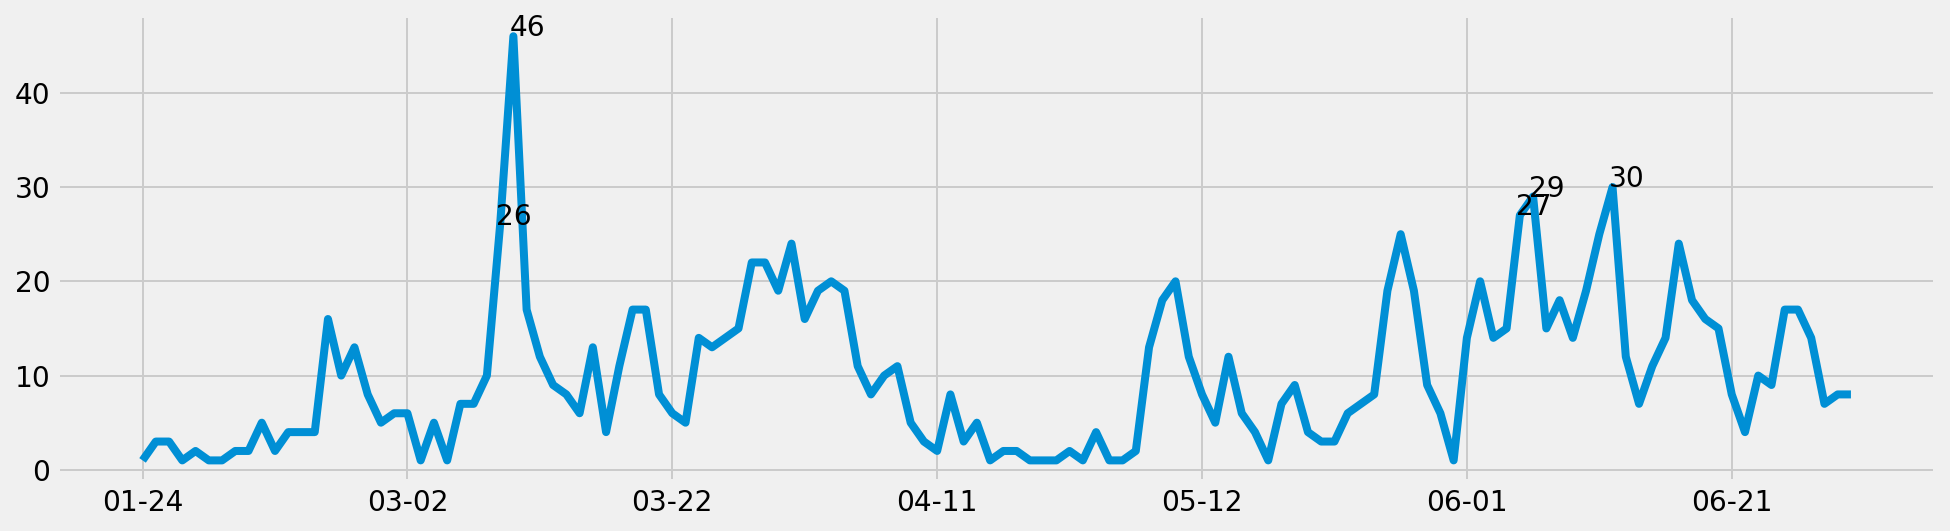

In [ ]:
g = day_count.plot(figsize = (15,4))

for i in range(len(day_count)):
  case_count = day_count.iloc[i]
  if case_count > 25:
    g.text(x=i-0.3, y =case_count, s =case_count)

### 확진자가 가장 많이 나온 날

In [ ]:
# describe 를 통해 일자별 확진자수를 describe를 통해 요약해 봅니다.



In [ ]:
# 확진자가 가장 많았던 날을 찾습니다.



In [ ]:
# 확진자가 가장 많았던 날의 발생이력을 찾습니다.



### 막대그래프 그리기

In [ ]:
# 선그래프로 그렸던 그래프를 막대그래프로 그립니다.



### 최근 데이터만 슬라이싱으로 나눠 그리기

In [ ]:
# 슬라이싱을 통해 최근 데이터만 그립니다.



### 월별 확진자 수 그리기

In [ ]:
# 월별 확진자수에 대한 빈도수를 구해서 시각화 합니다.



### 주단위 확진자수 그리기

In [ ]:
# 주별로 빈도수를 구합니다.




In [ ]:
# 주단위 빈도수 막대그래프로 그리기


### 월-주 함께 그리기

In [ ]:
# groupby 를 통해 "월", "주" 로 그룹화 하여 빈도수를 계산합니다.



In [ ]:
# 월-주 를 함께 그래프에 표현하기




## 모든 날짜를 행에 만들어 주기
* 확진자가 없는 날의 데이터도 만들어 줍니다.

In [ ]:
# 첫 확진일 부터 마지막 확진일까지 가져옵니다.
# 데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day 에 담습니다.



In [ ]:
# pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의 
# DatetimeIndex 를 만들고 days 라는 변수에 저장합니다.



In [ ]:
# days 변수의 값으로 "연월일" 이라는 컬럼이름을 갖는 데이터프레임을 만듭니다.



In [ ]:
# 확진일자별로 빈도수 구하기



In [ ]:
# 확진일자별로 빈도수 구한 내용을 데이터프레임으로 변환하기



In [ ]:
# value_counts 결과의 컬럼명을 "확진수" 로 바꾸기




### merge 를 통해 전체 확진일자 만들기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

In [ ]:
# 확진자가 없는 날도 일자에 표현이 되도록 전체 일자와 확진 데이터를 merge 로 합쳐줍니다.



## 누적 확진자 수 구하기

In [ ]:
# 확진수를 fillna를 통해 결측치를 0으로 채워주고 누적해서 더해줍니다.



In [ ]:
# 연도를 제외하고 월-일로 "일자" 컬럼 만들기



In [ ]:
# "확진수", "누적확진" 컬럼을 갖는 데이터프레임을 만듭니다.


### 데이터프레임으로 그리기

In [ ]:
# 데이터프레임으로 확진수와 누적확진을 선그래프로 그립니다.



### 시리즈로 그리기

In [ ]:
# 시리즈로 2개의 그래프 그리기



### 확진수만 따로 그리기

In [ ]:
# 누적확진수와 확진수와 차이가 크면 제대로 보이지 않기 때문에 확진수만 그립니다.



### 누적확진만 따로 그리기

In [ ]:
# 누적확진만 따로 그립니다.



### 로그스케일
* 차이가 너무 커서 그래프가 자세히 보이지 않을때 로그스케일로 표현하면 차이가 큰 값의 스케일을 조정해주게 됩니다.

### 확진월과 요일 구하기

## 요일별 확진 수 

In [ ]:
# 월별, 요일별 확진수를 groupby로 구하기



In [ ]:
# 숫자로 표현된 요일을 문자로 바꿔주기 위해 split 을 통해 문자를 리스트로 변경합니다.
# dayofweek


In [ ]:
# 컬럼의 이름을 한글요일명으로 변경해 줍니다.



In [ ]:
# style.background_gradient 로 색상을 표현합니다.



## 거주지별 확진자

In [ ]:
# 거주지(구별) 확진자의 빈도수를 구하고 시각화 합니다.



In [ ]:
# 구별 확진자의 수를 시각화 합니다.



In [ ]:
# 서울에서 확진판정을 받은 데이터이기 때문에 거주지가 서울이 아닐 수도 있습니다.
# 거주지 별로 서울시에 해당되는 데이터만 따로 가져옵니다.



In [ ]:
# 거주지가 서울이 아닌 지역을 따로 추출합니다.



In [ ]:
# 구를 전처리 하기 쉽게 컬럼으로 변환하기 위해 reset_index 로 변환합니다.



In [ ]:
# 서울에서 확진 받은 사람 중 서울 vs 타지역을 비교해 보기 위해
# "지역"이라는 새로운 컬럼을 만들어 서울지역이 아니라면 "타지역" 이라는 값을 넣어줍니다. 
# .loc[행인덱스]
# .loc[행, 열]
# .loc[조건, 열]



In [ ]:
# 위의 방법으로 할수도 있고 아래의 방법으로 만들수도 있습니다.
# 함수 혹은 익명함수를 사용하는 방법으로 "타지역" 값을 만들 수도 있습니다.



In [ ]:
# "지역" 컬럼으로 확진자 빈도수를 구합니다.



In [ ]:
# 위에서 구한 빈도수를 막대그래프로 그립니다.



## 접촉력

In [ ]:
# 접촉력 빈도수를 구합니다.



In [ ]:
# 접촉력의 unique 값만 구합니다.



In [ ]:
# "확인" 이 들어가는 접촉력만 찾습니다.



In [ ]:
# '확인 중', '확인중' => "확인 중" 으로 변경합니다.



In [ ]:
# "확인" 이 들어가는 접촉력만 찾습니다.



In [ ]:
# 접촉력 빈도수를 시각화 합니다.



In [ ]:
# 상위 15개만 구합니다.


In [ ]:
# 접촉력 빈도수가 높은 목록에 대한 index 값을 구해옵니다.



In [ ]:
# 위에서 구한 top_contact 에 해당되는 데이터만 isin 으로 가져옵니다.


In [ ]:
# 접촉력, 월별 빈도수를 groupby 로 구합니다.


### 이태원 클럽 관련
* 이태원 클럽 전파는 5월에 시작되었으나 6월에도 확진자가 있습니다.
* 6월에 이태원 클럽관련 확진자를 찾아봅니다.

### 감염경로 불명

In [ ]:
# "접촉력" 이 "확인 중"인 데이터만 구합니다.



In [ ]:
# 감염경로 불명이 어느정도인지 봅니다.


In [ ]:
# 전체 확진수를 value_counts 로 구하고 데이터프레임 형태로 만듭니다.
# all_weekly_case



In [ ]:
# 전체 확진수를 value_counts 로 구하고 데이터프레임 형태로 만듭니다.
# unknown_weekly_case



In [ ]:
# all_weekly_case 와 unknown_weekly_case 를 비교해 봅니다.



In [ ]:
# 위에서 구한 결과를 시각화 합니다.



In [ ]:
# 감염경로 "확인 중"의 주별 비율



## 가장 많은 전파가 일어난 번호
* [정규 표현식 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%ED%91%9C%ED%98%84%EC%8B%9D)


* 파이썬 공식문서 정규표현식 참고하기 : 
    * https://docs.python.org/3.8/library/re.html#re.sub
    
    
* 문자열 바꾸기 : re.sub("규칙", "패턴", "데이터")
    * https://docs.python.org/3.8/library/re.html#text-munging


* 정규표현식 문자열 패턴
    * https://docs.python.org/3.8/howto/regex.html#matching-characters

    
    
* [    ] : 일치시킬 문자 세트의 패턴
* [가나다] : 가 or 나 or 다 중에 하나를 포함하고 있는지
* [가-힣] : 한글 가부터 힣까의 문자 중 하나를 포함하고 있는지
* [0-9] : 0~9까지의 숫자 중 하나를 포함하고 있는지
* [^0-9] : 숫자를 포함하고 있지 않음
* [^가-힣] : 한글이 포함되어 있지 않음
* [가-힣+] : 한글이 하나 이상 포함되는지


In [ ]:
import re
# 정규표현식 라이브러리를 불러옵니다.
# 숫자외의 데이터는 제거하는 정규표현식
# #7265 접촉(추정)



In [ ]:
# 함수를 통해 숫자외의 문자를 제거하는 get_number 함수를 만듭니다.



In [ ]:
# 함수를 map을 통해 접촉번호를 구합니다.



In [ ]:
# 접촉번호가 없는 0번 행은 drop 으로 삭제합니다.
# 한번 drop 한 셀을 다시 drop 하면 이미 삭제를 했는데 다시 삭제하려 하기 때문에 KeyError 가 납니다. 
# 다시 실행했을 때 KeyError 가 발생하는 것이 정상입니다.



In [ ]:
# 상위 10개의 접촉번호를 구해서 top_contact_no 변수에 할당하고 재사용합니다.



In [ ]:
# contact의 환자번호와 df의 접촉번호를 merge 합니다.



## 조치사항

In [ ]:
# 조치사항에 대한 빈도수를 세어봅니다.
# value_counts 는 Series 에만 사용할 수 있습니다.
# 단일 변수의 빈도수를 세는데 사용합니다.



## 퇴원, 사망여부

In [ ]:
# 조치사항 컬럼을 통해 퇴원과 사망 컬럼을 새로 만듭니다.
# 또, 어느 병원에 조치되었는지도 병원 컬럼을 만들어서 담습니다.



In [ ]:
# 데이터 수집 시점에서 퇴원하지 못한 환자수



In [ ]:
# 퇴원여부 빈도수에 대한 비율을 구합니다.



In [ ]:
# 사망여부에 따른 빈도수를 구합니다.



In [ ]:
# 사망 여부에 따른 빈도수의 비율을 구합니다.


* 데이터 수집 시점 기준 현재까지 입원해 있는 확진자 중 가장 오래 입원해 있는 확진자

In [ ]:
# 데이터 수집 시점 기준 현재까지 입원해 있는 확진자 중 가장 오래 입원해 있는 확진자



## 병원

In [ ]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수



In [ ]:
# 병원의 빈도수를 구합니다.



In [ ]:
# 병원별 빈도수를 막대그래프로 표현합니다.



In [ ]:
# 입원환자가 많은 병원을 구합니다.



### iloc 로 일부 데이터만 보기

In [ ]:
# 전체 데이터를 보기에 너무 많을 수 있기 때문에 iloc 를 사용해서 일부 데이터만 봅니다.



### loc로 일부 데이터만 보기
* iloc 와 loc의 차이점을 비교해 보세요.

### pandas style 적용하기

In [ ]:
# 전체 병원이 너무 많기 때문에 환자가 많은 병원만 따로 봅니다.


## 여행력

In [ ]:
# "해외" 라는 컬럼을 만들어 데이터를 전처리 합니다.
# "여행력"에 "-" 문자가 들어가 있으면 결측치로 처리합니다.
# df["해외"]


In [ ]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수


### 여행력이 있는 데이터만 가져와서 서브셋 만들기

In [ ]:
# "해외" 컬럼의 값이 결측치가 아닌 데이터만 가져와서 
# df_oversea 라는 새로운 데이터프레임에 담습니다.


In [ ]:
# 중복되는 지역명이 있는지 확인합니다.


### 텍스트 데이터 다루기
[Working with text data — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern)

In [ ]:
# 유럽 지역을 방문했다면 유럽이라고 바꿔주기 위해 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
europe = "체코, 헝가리, 오스트리아, 이탈리아, 프랑스, 모로코, 독일, 스페인, 영국, 폴란드, 터키, 아일랜드"


In [ ]:
# 남미 지역에 해당되는 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
south_america = "브라질, 아르헨티아, 칠레, 볼리비아, 멕시코, 페루"


In [ ]:
# 중복되는 국가나 지역을 특정 텍스트로 변경해서 그룹화 해서 빈도수를 세어볼 예정입니다.
# .str.contains 와 .loc 를 사용해서 전처리 합니다.



In [ ]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수


In [ ]:
# 확진일자, 해외 별 카운트 수를 구합니다.



In [ ]:
# 위에서 구한 값을 바탕으로 지역별 누적 확진수를 구합니다.



In [ ]:
# 위에서 구한 값을 reset_index() 를 통해 데이터프레임으로 변경하고 "연번" 컬럼을 "확진자수"로 변경합니다.



In [ ]:
# "해외" 컬럼의 빈도수를 구합니다.


In [ ]:
# 위에서 구한 빈도수를 시각화 합니다.


In [ ]:
# "해외유입 구별 확진자" 시각화 하기



### 전체확진수와 해외유입 확진수 비교

In [ ]:
# all_count_gu 변수에 전체 지역의 확진자수 구하기


In [ ]:
# 데이터프레임으로 변환하고 컬럼명 변경하기



In [ ]:
# 해외유입확진수 구하기



### merge 를 통해 전체 확진수와 해외유입확진수 비교하기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

In [ ]:
# merge 로 합쳐서 전체확진수와 해외유입확진수 비교해 보기



In [ ]:
# 시각화 하기



In [ ]:
# df_all_oversea_case["해외유입비율"] 구하기



### 해외유입 확진자 중 퇴원 여부

In [ ]:
# oversea_finish_count 해외유입 확진자 중 퇴원 여부 구하기



### 월별 해외 확진자 수

### 구와 월별 해외 확진자 수
* groupby, crosstab, pivot_table 로 같은 결과의 테이블이 나오도록 구합니다.
#### groupby 로 빈도수 구하기

#### crosstab 으로 빈도수 구하기

#### pivot_table 로 빈도수 구하기

### 해외유입이 많은 지역

In [ ]:
# 해외유입이 많은 상위 10개 지역을 구합니다.
# top_oversea_gu


In [ ]:
# 시각화 하기



### 구별 해외유입 국가 분석하기
#### groupby 로 구하기

#### pivot table 로 구하기
* groupby 로 구한 결과와 같은 결과가 나오게 구합니다.

#### 일부 구만 따로 보기
* 전체는 너무 많기 때문에 특정 구만 따로 봅니다.

In [ ]:
# 강남 3구의 입국자는 해외 어느 지역에서 입국했나?



In [ ]:
# top_oversea_gu 에 따른 확진수 보기


### 최근 데이터를 불러와 실습해 보기
* 이 실습을 진행하고 계신 여러분들은 이 시점보다 미래에 있겠죠?
* 같은 내용의 실습을 최근 데이터로 해보세요!